# EDA

## Include libraries

In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from area import area

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)

MAIN_COLOR = 'forestgreen'

## Load data and first look

In [3]:
df = pd.read_csv("train_dataset_train.csv")

In [4]:
df.head(3)

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-21,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-06,nd_mean_2021-06-09,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-07,nd_mean_2021-08-12,.geo,nd_mean_2021-04-15,nd_mean_2021-04-18,nd_mean_2021-04-25,nd_mean_2021-04-27,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-06-07,nd_mean_2021-06-12,nd_mean_2021-06-28,nd_mean_2021-08-01,nd_mean_2021-08-11,nd_mean_2021-05-01,nd_mean_2021-05-03,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-04-20,nd_mean_2021-04-23,nd_mean_2021-05-09,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,0.484102,0.201013,0.029708,0.397833,0.384805,0.015936,0.007275,0.441994,0.172777,0.000000,0.412072,0.507029,0.490741,0.549791,0.460996,0.100555,0.706968,0.691171,0.711135,0.731325,0.718093,0.000000,0.147169,0.728053,0.112933,0.727516,0.000000,0.000000,0.658016,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",0.187150,0.262300,0.077577,0.000476,0.000000,0.000000,0.111821,0.038902,0.155038,0.754859,0.000000,0.121799,0.083970,0.213006,0.358304,0.271128,0.173833,0.014060,0.030883,0.034858,0.063134,0.000000,0.102757,0.425571,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,0.519456,0.501486,0.047332,0.448796,0.692873,0.628463,0.016747,0.000000,0.059826,0.000000,0.492250,0.708562,0.668011,0.675501,0.694017,0.654727,0.709037,0.696734,0.268523,0.076741,0.638567,0.676917,0.460940,0.059759,0.073804,0.666918,0.089721,0.184231,0.601685,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",0.245285,0.349133,0.173578,0.196361,0.015048,0.242130,0.708402,0.150383,0.432990,0.706226,0.618475,0.047408,0.000000,0.160796,0.031104,0.000000,0.040128,0.194295,0.062582,0.000000,0.064671,0.024539,0.000000,0.248935,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,0.000000,0.561541,0.000000,0.029533,0.245910,0.650065,0.000000,0.516493,0.000000,0.717313,0.649345,0.740904,0.652131,0.739836,0.595076,0.741171,0.648106,0.241615,0.586071,0.551204,0.522871,0.543462,0.000000,0.172532,0.119380,0.321827,0.411168,0.357296,0.000000,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",0.006391,0.000000,0.041751,0.169020,0.011260,0.118255,0.056252,0.011727,0.172335,0.000000,0.172080,0.230169,0.024845,0.151504,0.002801,0.011655,0.000000,0.135650,0.045370,0.000000,0.000000,0.112471,0.028961,0.127633,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   area                4830 non-null   int64  
 2   nd_mean_2021-04-16  4830 non-null   float64
 3   nd_mean_2021-04-19  4830 non-null   float64
 4   nd_mean_2021-04-22  4830 non-null   float64
 5   nd_mean_2021-04-26  4830 non-null   float64
 6   nd_mean_2021-04-28  4830 non-null   float64
 7   nd_mean_2021-05-02  4830 non-null   float64
 8   nd_mean_2021-05-04  4830 non-null   float64
 9   nd_mean_2021-05-07  4830 non-null   float64
 10  nd_mean_2021-05-16  4830 non-null   float64
 11  nd_mean_2021-05-17  4830 non-null   float64
 12  nd_mean_2021-05-21  4830 non-null   float64
 13  nd_mean_2021-05-26  4830 non-null   float64
 14  nd_mean_2021-05-27  4830 non-null   float64
 15  nd_mean_2021-05-29  4830 non-null   float64
 16  nd_mea

In [6]:
df[df['.geo'].duplicated()]

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-21,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-06,nd_mean_2021-06-09,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-07,nd_mean_2021-08-12,.geo,nd_mean_2021-04-15,nd_mean_2021-04-18,nd_mean_2021-04-25,nd_mean_2021-04-27,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-06-07,nd_mean_2021-06-12,nd_mean_2021-06-28,nd_mean_2021-08-01,nd_mean_2021-08-11,nd_mean_2021-05-01,nd_mean_2021-05-03,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-04-20,nd_mean_2021-04-23,nd_mean_2021-05-09,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop


## Preprocess

In [7]:
df['.geo'].iloc[0]

'{"type":"Polygon","coordinates":[[[42.49107269973438,51.41403574496151],[42.49110837387818,51.414002363422505],[42.49117529278507,51.413977281596345],[42.49200909402263,51.41382989238087],[42.49349404052769,51.413610194094936],[42.49531777896226,51.413346001166964],[42.49717278800062,51.41305397148597],[42.498568452895036,51.41284542430095],[42.49967878386881,51.412672945330755],[42.500954067797025,51.412475482923625],[42.50181909560708,51.41235589276749],[42.50281798461579,51.41221403620468],[42.50329060012424,51.4121445501621],[42.50376332703639,51.412036088252606],[42.504574791962916,51.4119108862308],[42.50572530365292,51.411738499750314],[42.50685788892524,51.4115715563273],[42.5077453104152,51.41143532069366],[42.50854345509667,51.411329655281435],[42.50910975482554,51.41124336649502],[42.50949770475502,51.41117108414281],[42.5095914001725,51.411154410875746],[42.509791991510056,51.411157227294886],[42.50985441311349,51.411176688623506],[42.50991236732526,51.41121001022351],[42.

In [8]:
df['.geo_shape'] = df['.geo'].apply(lambda x: ast.literal_eval(x)['type'])
df['.geo_shape'].value_counts()

Polygon               4801
MultiPolygon            19
GeometryCollection      10
Name: .geo_shape, dtype: int64

In [9]:
df[['id', '.geo_shape', 'crop']].groupby(['.geo_shape', 'crop']).agg('count')

id
.geo_shape         crop     
GeometryCollection 0       1
                   1       3
                   2       1
                   3       1
                   4       1
                   5       1
                   6       2
MultiPolygon       0       1
                   1       8
                   2       2
                   3       1
                   5       5
                   6       2
Polygon            0     724
                   1     689
                   2     694
                   3     653
                   4     717
                   5     662
                   6     662

In [10]:
df['.geo'].apply(lambda x: ast.literal_eval(x).keys()).value_counts()

(type, coordinates)    4820
(type, geometries)       10
Name: .geo, dtype: int64

`GeometryCollection` has many of geometries

In [11]:
df[df['.geo_shape'] == 'GeometryCollection']['.geo'].iloc[0]

'{"type":"GeometryCollection","geometries":[{"type":"LineString","coordinates":[[43.65890680485278,55.1832047856361],[43.65888005024646,55.18320478563611]]},{"type":"Polygon","coordinates":[[[43.65447447423357,55.18565387536262],[43.65455026465382,55.185485895810054],[43.65467512531156,55.185378920964965],[43.65511205022921,55.18503273801068],[43.65582558455572,55.184442090433585],[43.65640521765076,55.18400162043294],[43.65724354117146,55.183385589367155],[43.65836277465715,55.1826217405513],[43.658826509055665,55.182359503126726],[43.65892459422138,55.18227551908135],[43.65891128688905,55.18212271047012],[43.65867489122274,55.18202601018481],[43.65807748312784,55.18181978565501],[43.65785890212811,55.18166954771767],[43.65782316207378,55.1815269861084],[43.65791694212747,55.181267272552745],[43.65813546101638,55.18079626192276],[43.65864817900073,55.17958424988001],[43.65874627212283,55.17919472253095],[43.65883545246849,55.17858869193293],[43.65892467713922,55.17811766853075],[43.65

In [12]:
df[df['.geo_shape'] == 'GeometryCollection']['.geo'].apply(lambda x: len(ast.literal_eval(x)['geometries']))

489      2
839     46
858      2
1523     3
1763     2
1944     4
2620     2
3079    15
3512     2
4535     2
Name: .geo, dtype: int64

In [13]:
df[df['.geo_shape'] == 'GeometryCollection']['.geo'].apply(lambda x: [l['type'] for l in ast.literal_eval(x)['geometries']])

489                                 [LineString, Polygon]
839     [LineString, LineString, LineString, LineStrin...
858                                 [LineString, Polygon]
1523                       [LineString, Polygon, Polygon]
1763                                [LineString, Polygon]
1944           [LineString, LineString, Polygon, Polygon]
2620                                [LineString, Polygon]
3079    [LineString, LineString, LineString, LineStrin...
3512                                [LineString, Polygon]
4535                                [LineString, Polygon]
Name: .geo, dtype: object

Get latitude and longitude

In [14]:
df['.geo_lat'] = df['.geo'].apply(lambda x: 
                                    ( 
                                        ast.literal_eval(x)['coordinates'][0][0][0][0] 
                                        if isinstance(ast.literal_eval(x)['coordinates'][0][0][0], list) 
                                        else ast.literal_eval(x)['coordinates'][0][0][0]
                                    )
                                    if ast.literal_eval(x).get('coordinates')
                                    else ast.literal_eval(x)['geometries'][0]['coordinates'][0][0]
                                )
df['.geo_lon'] = df['.geo'].apply(lambda x: 
                                    (
                                        ast.literal_eval(x)['coordinates'][0][0][0][1] 
                                        if isinstance(ast.literal_eval(x)['coordinates'][0][0][1], list) 
                                        else ast.literal_eval(x)['coordinates'][0][0][1]
                                    )
                                    if ast.literal_eval(x).get('coordinates')
                                    else ast.literal_eval(x)['geometries'][0]['coordinates'][0][1]
                                )
df['.geo_zone'] = 0
df.loc[(df['.geo_lat'] < 35.5) & (df['.geo_lon'] < 54), '.geo_zone'] = 1
df.loc[(df['.geo_lat'] > 35.5) & (df['.geo_lat'] < 38) & (df['.geo_lon'] < 54), '.geo_zone'] = 2
df.loc[(df['.geo_lat'] > 38) & (df['.geo_lat'] < 44) & (df['.geo_lon'] < 52.5), '.geo_zone'] = 3
df.loc[(df['.geo_lat'] > 43) & (df['.geo_lat'] < 47) & (df['.geo_lon'] > 54), '.geo_zone'] = 4
df.loc[(df['.geo_lat'] > 47), '.geo_zone'] = 5
df['.geo_zone'].value_counts()

5    1594
3    1321
1     738
0     482
2     379
4     316
Name: .geo_zone, dtype: int64

Area calculating

In [15]:
df['.geo_area'] = df['.geo'].apply(lambda x: area(ast.literal_eval(x))) / 10000

Count of missing NDVI and max NDVI

In [16]:
ndvi_columns = [nd for nd in df.columns if 'nd_mean' in nd]
df['ndvi_miss_count'] = df[ndvi_columns].eq(0).sum(axis=1)
df['ndvi_max'] = df[ndvi_columns].max(axis=1)
df['ndvi_min'] = df[df != 0][ndvi_columns].min(axis=1)
df['ndvi_mean'] = df[df != 0][ndvi_columns].mean(axis=1)

## EDA

In [17]:

def plot_dist(data, title='', xlabel='', ylabel='', binstep=0.05, figsize=(20,8)):
    ''' Plot histogram and boxplot '''

    _, (ax1, ax2) = plt.subplots(
        nrows=2, ncols=1,
        figsize=figsize
    )

    xticks_range = np.arange(data.min(), data.max() + 2*binstep, binstep)

    #ax1.hist(data, bins=np.arange(data.min(), data.max())-0.5, color='darkviolet', edgecolor='black')
    sns.histplot(data, bins=xticks_range - 0.5*binstep, color = MAIN_COLOR, ax = ax1)
    #ax2.boxplot(data.values, vert=False)
    sns.boxplot(x=data, color = MAIN_COLOR, ax = ax2)

    ax1.axvline(x=data.mean(), color='r', linestyle='-', label = 'Mean = {:.2f}'.format(data.mean()))
    ax1.axvline(x=data.median(), color='darkviolet', linestyle='-', label = 'Median = {:.2f}'.format(data.median()))

    q1, q3 = np.percentile(data.dropna(), [25 ,75])
    iqr = q3 - q1
    loval = q1 - 1.5 * iqr
    hival = q3 + 1.5 * iqr
    wiskhi = np.compress(data.values <= hival, data.values)
    wisklo = np.compress(data.values >= loval, data.values)
    actual_hival = np.max(wiskhi)
    actual_loval = np.min(wisklo)

    ax1.axvline(x=q1, color='cyan', linestyle='-', label = '25% = {:.2f}'.format(q1))
    ax1.axvline(x=q3, color='b', linestyle='-', label = '75% = {:.2f}'.format(q3))
    ax1.axvline(x=actual_loval, color='hotpink', linestyle='-', label = 'Q1 - IQR*1.5 = {:.2f}'.format(actual_loval))
    ax1.axvline(x=actual_hival, color='darkorange', linestyle='-', label = 'Q3 + IQR*1.5 = {:.2f}'.format(actual_hival))
    ax1.legend(loc='upper right', fontsize=8)

    ax1.set_xticks(xticks_range)
    ax1.xaxis.set_tick_params(labelsize=8)
    ax1.yaxis.set_tick_params(labelsize=8)
    ax1.set_title(title, fontsize=12)
    ax1.set_xlabel(xlabel, fontsize=10)
    ax1.set_ylabel(ylabel, fontsize=10)
    ax1.grid(axis='y')

    ax2.set_xlim(ax1.get_xlim())    # sync 'x' axis of axes
    ax2.set_xticks(xticks_range)
    ax2.xaxis.set_tick_params(labelsize=8)
    ax2.yaxis.set_tick_params(labelsize=8)
    ax2.set_xlabel(xlabel, fontsize=10)
    ax2.grid()

    plt.show()

In [18]:
df.describe()

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-21,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-06,nd_mean_2021-06-09,nd_mean_2021-06-13,nd_mean_2021-06-16,nd_mean_2021-06-18,nd_mean_2021-06-19,nd_mean_2021-06-20,nd_mean_2021-06-22,nd_mean_2021-06-25,nd_mean_2021-06-27,nd_mean_2021-07-07,nd_mean_2021-07-08,nd_mean_2021-07-09,nd_mean_2021-07-13,nd_mean_2021-07-15,nd_mean_2021-07-17,nd_mean_2021-07-20,nd_mean_2021-07-26,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-07,nd_mean_2021-08-12,nd_mean_2021-04-15,nd_mean_2021-04-18,nd_mean_2021-04-25,nd_mean_2021-04-27,nd_mean_2021-04-29,nd_mean_2021-04-30,nd_mean_2021-06-07,nd_mean_2021-06-12,nd_mean_2021-06-28,nd_mean_2021-08-01,nd_mean_2021-08-11,nd_mean_2021-05-01,nd_mean_2021-05-03,nd_mean_2021-05-10,nd_mean_2021-05-15,nd_mean_2021-06-02,nd_mean_2021-06-03,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-04-20,nd_mean_2021-04-23,nd_mean_2021-05-09,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop,.geo_lat,.geo_lon,.geo_zone,.geo_area,ndvi_miss_count,ndvi_max,ndvi_min,ndvi_mean
count,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000,4830.000000
mean,3473.406211,53.871429,0.149911,0.118843,0.158939,0.166146,0.125002,0.162440,0.092302,0.108834,0.427274,0.389136,0.125574,0.378478,0.420836,0.310042,0.193593,0.197731,0.111018,0.250890,0.652045,0.679405,0.686161,0.695537,0.630958,0.419945,0.692023,0.645954,0.646549,0.578451,0.351830,0.485427,0.380000,0.472926,0.400207,0.403969,0.322940,0.261678,0.454516,0.141455,0.144619,0.102169,0.096091,0.112668,0.130129,0.211414,0.101073,0.145435,0.368242,0.204823,0.111236,0.091728,0.171972,0.249780,0.146855,0.197023,0.129666,0.135701,0.167788,0.117383,0.088569,0.099568,0.166118,0.153016,0.168406,0.111583,0.141471,0.172343,0.121483,0.145211,0.107207,0.119274,2.953830,43.569442,53.332319,3.042029,53.779521,8.551346,0.806901,0.004707,0.303026
std,1984.993812,34.191660,0.112598,0.103192,0.136001,0.123605,0.117605,0.145027,0.095207,0.120939,0.184099,0.211723,0.163099,0.254854,0.256278,0.269017,0.236679,0.244747,0.153230,0.288470,0.210413,0.190481,0.173275,0.169189,0.215666,0.318340,0.157367,0.213881,0.173050,0.243321,0.285447,0.266493,0.286305,0.256208,0.282187,0.273735,0.279857,0.255297,0.221768,0.107284,0.117913,0.100976,0.099096,0.110298,0.121057,0.242322,0.126644,0.196925,0.284816,0.223281,0.121667,0.093526,0.188491,0.212758,0.196695,0.240109,0.179797,0.172781,0.193051,0.107475,0.084578,0.105928,0.188498,0.185321,0.219428,0.150879,0.190674,0.228629,0.151392,0.162711,0.108508,0.155346,2.004587,7.921262,1.903932,1.723990,34.130130,2.770760,0.066519,0.004587,0.035709
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

### Target

In [19]:
df['crop'].value_counts()

0    726
4    718
1    700
2    697
5    668
6    666
3    655
Name: crop, dtype: int64

### ID

In [20]:
df['id'].value_counts()

3536    1
2234    1
5823    1
2108    1
4068    1
       ..
2702    1
2088    1
1793    1
958     1
860     1
Name: id, Length: 4830, dtype: int64

ndvi_max

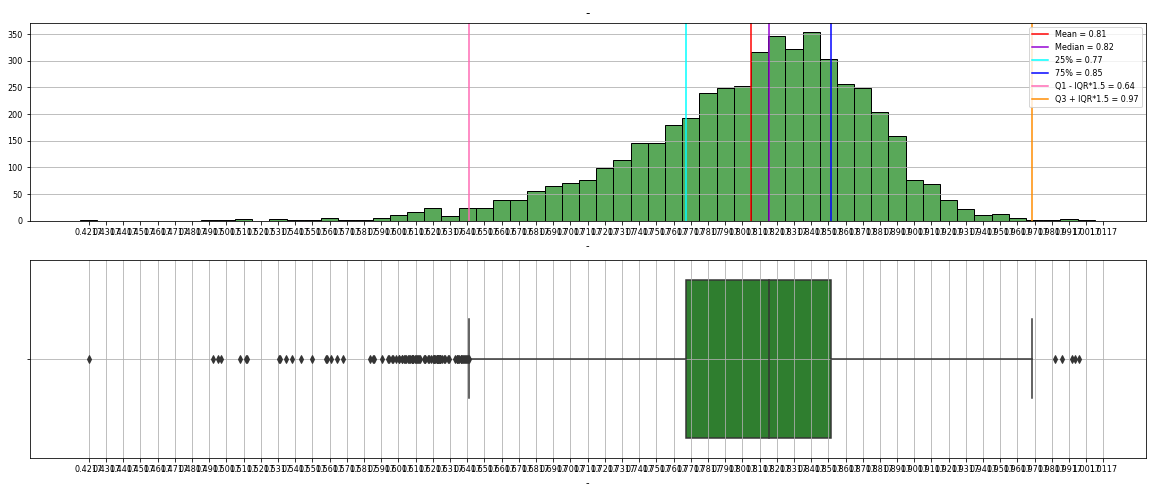

In [21]:
data = df['ndvi_max']
plot_dist(data, title='-', xlabel='-', binstep=0.01)

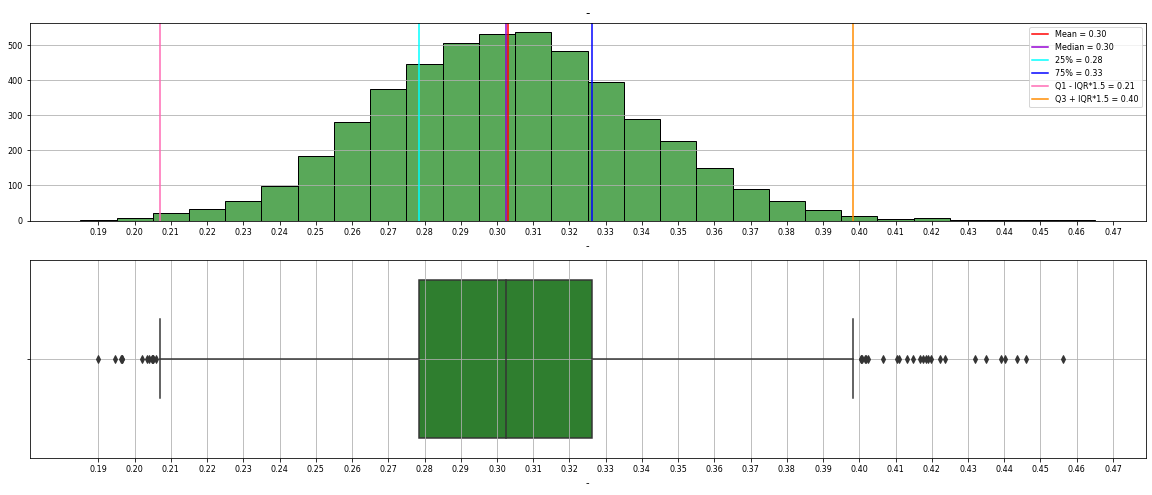

In [22]:
data = df['ndvi_mean']
plot_dist(data, title='-', xlabel='-', binstep=0.01)

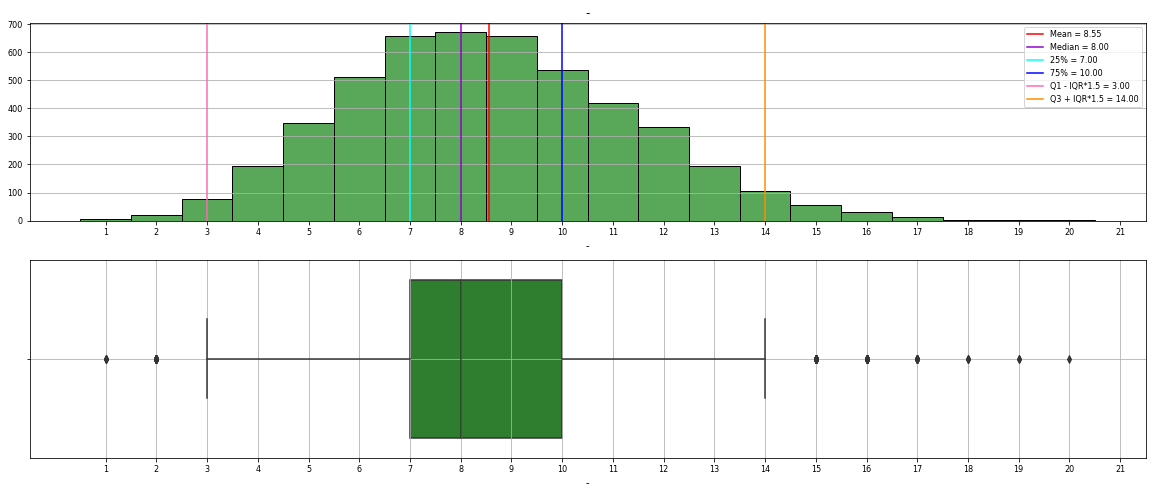

In [23]:
data = df['ndvi_miss_count']
plot_dist(data, title='-', xlabel='-', binstep=1.0)

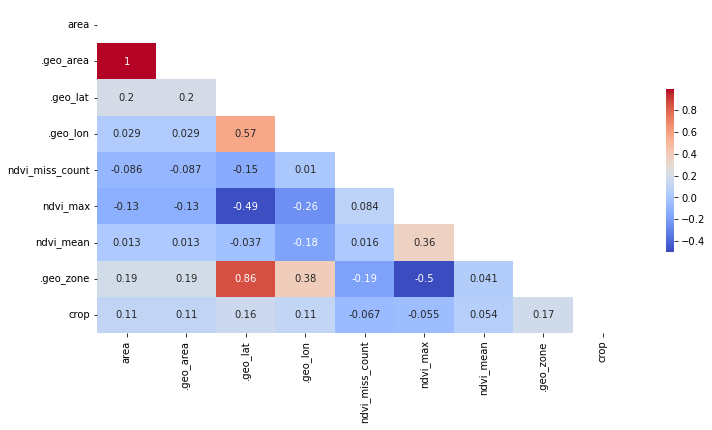

In [24]:
corrMatrix = df[['area', '.geo_area', '.geo_lat', '.geo_lon', 'ndvi_miss_count',
                 'ndvi_max', 'ndvi_mean', '.geo_zone', 'crop']].corr(method='pearson', min_periods=1)
plt.figure(figsize=(12,6))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))
ax = sns.heatmap(corrMatrix, annot=True, mask=mask, cbar_kws={"shrink": .5}, cmap='coolwarm')
plt.show()